In [51]:
# Load the data and libraries
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from scipy.special import expit as invlogit

data = pd.read_csv('../data/Free throw.csv.zip').drop('Timestamp', axis=1)
data.columns = ['age', 'gender', 'athleticism', 'y0', 'y1']

true_effect = data.y1 - data.y0
x = data.athleticism
y0 = data.y0
y1 = data.y1

n = len(data)

#np.random.seed(42)
#n = 1000
#x = np.random.randint(1, 11, size=n)
#y1 = np.random.binomial(50, invlogit(0.2 * x - 1.5))
#y0 = np.random.binomial(50, invlogit(0.2 * x - 2.0))
#data = pd.DataFrame({"x": x, "y1": y1, "y0": y0})

print(f'True ATE for all respondents {true_effect.mean():.2f} with an sd of {true_effect.std():.2f}')

True ATE for all respondents 12.82 with an sd of 7.26


In [52]:
### Assign random treatment

z = np.random.binomial(1, 0.5, size=n)
y = np.where(z == 1, y1, y0)

est = np.mean(y[z == 1]) - np.mean(y[z == 0])
s1 = np.std(y[z == 1], ddof=1)
s0 = np.std(y[z == 0], ddof=1)
n1 = np.sum(z == 1)
n0 = np.sum(z == 0)
se = np.sqrt(s1**2 / n1 + s0**2 / n0)

print(f'Random treatment ATE {est:.2f} with sd of {se:.2f}')

Random treatment ATE 16.07 with sd of 3.91


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  10.486  1.939   6.926   14.155      0.040    0.030    2363.0    1756.0   
beta   14.517  3.375   8.398   20.915      0.072    0.051    2286.0    1707.0   
sigma   6.721  1.296   4.561    9.125      0.028    0.020    2076.0    1953.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


<Axes: title={'center': 'beta'}>

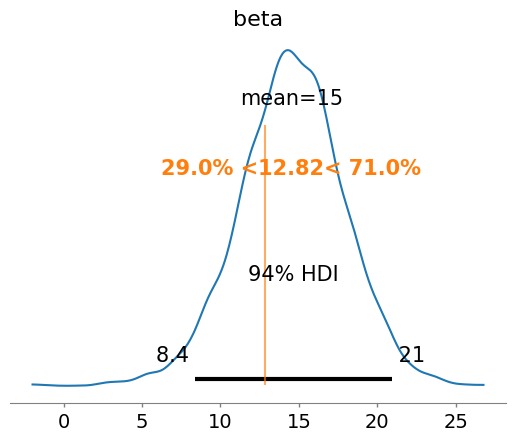

In [53]:
## Next let's estimate it using a model

with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfCauchy("sigma", beta=5)

    mu = alpha + beta * z
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(chains=4)

print(pm.summary(trace))
pm.plot_posterior(trace, var_names=["beta"], ref_val=12.82)

(array([  15.,   64.,  221.,  623., 1067., 1034.,  713.,  200.,   54.,
           9.]),
 array([-4.00245155, -1.37099388,  1.26046379,  3.89192146,  6.52337913,
         9.1548368 , 11.78629447, 14.41775214, 17.04920981, 19.68066749,
        22.31212516]),
 <BarContainer object of 10 artists>)

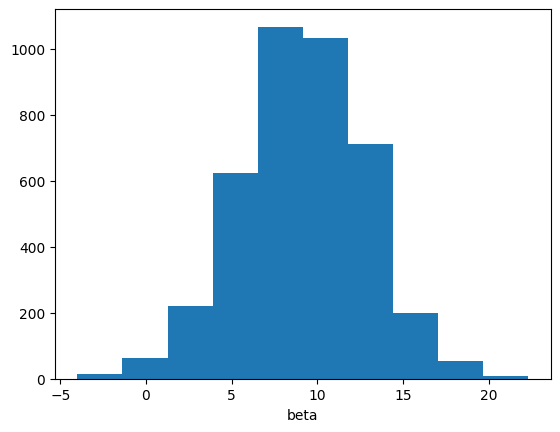

In [50]:
trace.posterior.beta.plot.hist()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [alpha, beta_x, beta_z, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  -4.028  5.903 -15.046    6.989      0.140    0.100    1793.0    1859.0   
beta_x  3.731  1.436   1.121    6.509      0.037    0.026    1479.0    1760.0   
beta_z  4.611  5.950  -6.340   16.345      0.141    0.100    1798.0    1878.0   
sigma   8.610  1.667   5.931   11.850      0.035    0.025    2489.0    2117.0   

        r_hat  
alpha     1.0  
beta_x    1.0  
beta_z    1.0  
sigma     1.0  


<Axes: title={'center': 'beta_z'}>

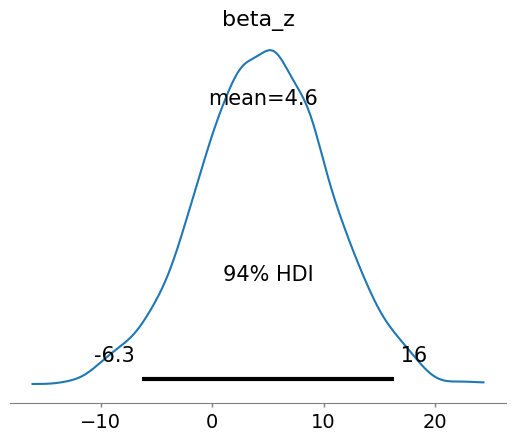

In [55]:
### Biased estimate

p_treat = invlogit(x - 5.5)
z = np.random.binomial(1, p_treat)
y = np.where(z == 1, y1, y0)

# Estimate the ATE with a model

with pm.Model() as model2:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta_x = pm.Normal("beta_x", mu=0, sigma=10)
    beta_z = pm.Normal("beta_z", mu=0, sigma=10)
    sigma = pm.HalfCauchy("sigma", beta=5)

    mu = alpha + beta_x * x + beta_z * z
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(chains=4)

print(pm.summary(trace))
pm.plot_posterior(trace, var_names=["beta_z"])

In [ ]:
### Now add adjustment for pre-treatment and model the ETA again



In [ ]:
# Biased in the other direction

p_treat = invlogit(-(x - 5.5))
z = np.random.binomial(1, p_treat)
y = np.where(z == 1, y1, y0)

# Estimate the ATE with a model

with pm.Model() as model3:
    ...

In [ ]:
# Code the model

import pymc as pm

with pm.Model() as model:
    ...